In [ ]:
import sys
import scipy
import numpy
import matplotlib
import pandas
import sklearn
print('Python: {}'.format(sys.version))
print('scipy: {}'.format(scipy.__version__))
print('numpy: {}'.format(numpy.__version__))
print('pandas: {}'.format(pandas.__version__))
print('sklearn: {}'.format(sklearn.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))

Python: 3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]
scipy: 1.4.1
numpy: 1.19.5
pandas: 1.1.5
sklearn: 0.22.2.post1
matplotlib: 3.2.2


In [ ]:
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd
 

In [ ]:
# Load Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump_thickness','uniform_cell_size','uniform_cell_shape','marginal_adhesion','single_epithelial_size','bare_nuclei',
         'bland_chromation','normal_nucleoli','nutises','class']
df = pd.read_csv(url,names=names)

There are some steps to be considered

*   First, our dataset contains some missiong data. To deal with this we will add a df.replace method
*   If df.replace method gives us a question mark. It means that there is no data there. We are simply going to input the value -999999 and tell python to ignore that data


*   We will then perform the print(df.axes) operation so that we can see the columns. We can see that we have 699 different data points and each of those cases has 11 different columns
*   next we will print the shape of the dataset using the print(df.shape) operation





In [ ]:
#Preprocess the data
df.replace('?',-999999, inplace=True)
print(df.axes)
df.drop(['id'],1,inplace=True)
#print the shape of the dataset
print(df.shape)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromation', 'normal_nucleoli', 'nutises', 'class'],
      dtype='object')]
(699, 10)


we can detect whether the tumor is benign (which means it is non-cancerous) or maglignant (which means it is cancerous)

In [ ]:
#Do dataset visualization
print(df.loc[6])

clump_thickness            1
uniform_cell_size          1
uniform_cell_shape         1
marginal_adhesion          1
single_epithelial_size     2
bare_nuclei               10
bland_chromation           3
normal_nucleoli            1
nutises                    1
class                      2
Name: 6, dtype: object


We will visualize the parameters of the dataset

*   We will print the first point so that we can see what it entails.
*   We have a value of between 0 and 10 in all of the different columns. In the class column, the number 2 represents a benign tumor and the number 4 represents a malignant tumor.


*   There are 699 cells in the datasets
*   The next step will be to do a print.describe operation, which gives us the mean, standard deviaion, and other aspects for each of our different parameters or features.





In [ ]:
# Do dataset visualizations
print(df.loc[6])
print(df.describe())

clump_thickness            1
uniform_cell_size          1
uniform_cell_shape         1
marginal_adhesion          1
single_epithelial_size     2
bare_nuclei               10
bland_chromation           3
normal_nucleoli            1
nutises                    1
class                      2
Name: 6, dtype: object
       clump_thickness  uniform_cell_size  ...     nutises       class
count       699.000000         699.000000  ...  699.000000  699.000000
mean          4.417740           3.134478  ...    1.589413    2.689557
std           2.815741           3.051459  ...    1.715078    0.951273
min           1.000000           1.000000  ...    1.000000    2.000000
25%           2.000000           1.000000  ...    1.000000    2.000000
50%           4.000000           1.000000  ...    1.000000    2.000000
75%           6.000000           5.000000  ...    1.000000    4.000000
max          10.000000          10.000000  ...   10.000000    4.000000

[8 rows x 9 columns]


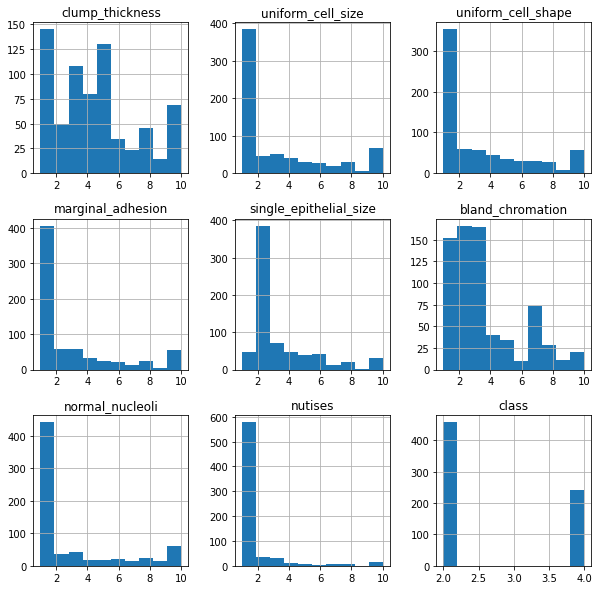

In [ ]:
#plot histograms for each variable
df.hist(figsize=(10,10))
plt.show()

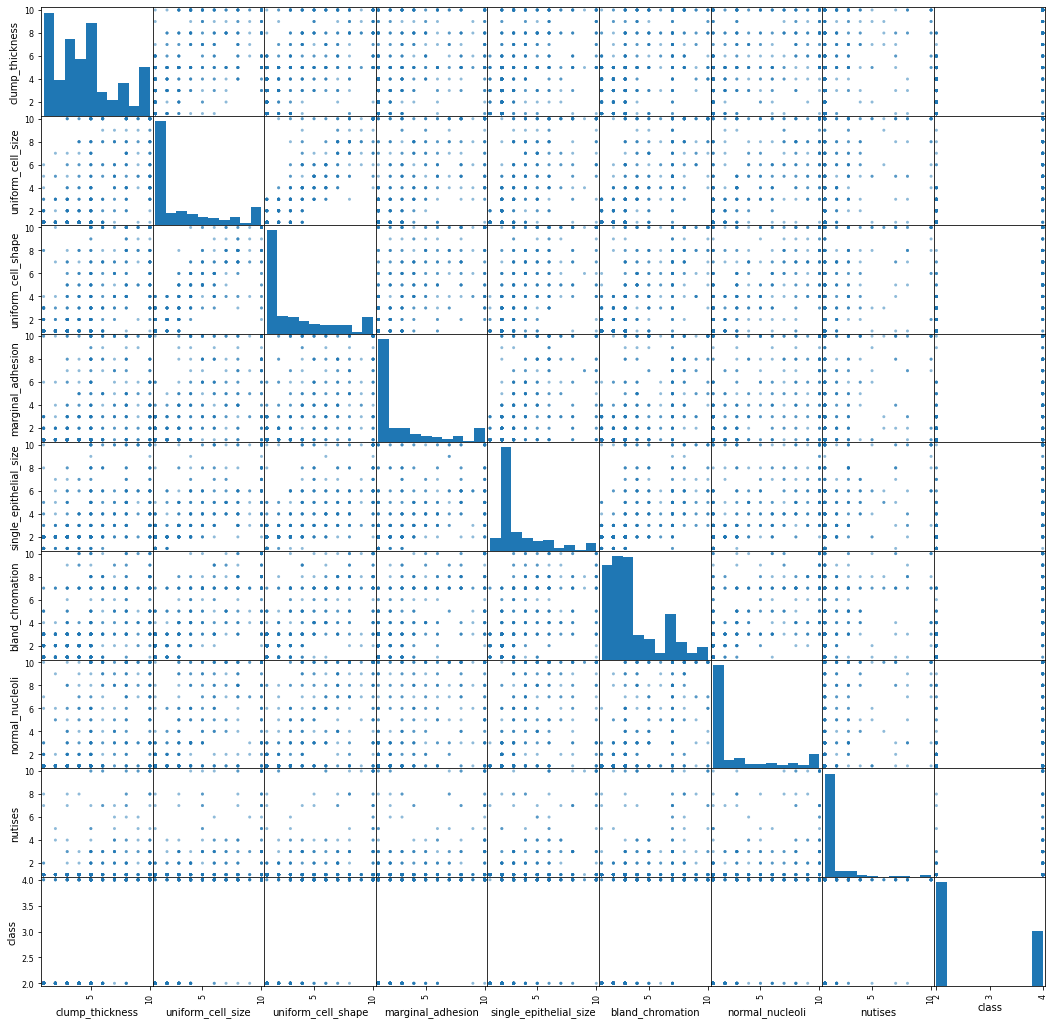

In [ ]:
scatter_matrix(df,figsize=(18,18))
plt.show()

There are some steps will help you to better undersand the machine learning algorithm:


1.   The first step is that we need to perform is to split our dataset into X and y datasets for training. We will not train all of the available data as we need to save some for our validation step. This will help us to determine how well these algorithms can generalize to new data and not just how well they know the training data. Our X data will contain all of the variables except for the class column and our Y data is going to be the class colum which is the classification of whether a tumor is malignant or benign

1.   Next we will use the train_test_split function and we will then spit our data into y_train, y_test, X_train, and X_test, respective
2.   In the same line we will add model_selection, train test_split and x,y,test_size. About 20% of our data is fairly standard, so we will make the test size 0.2 to test the data.




In [ ]:
#Create X and Y datasets for training
X = np.array(df.drop(['class'],1))
y = np.array(df['class'])
X_train, X_test,y_train,y_test= model_selection.train_test_split(X,y,test_size=0.2)

In [ ]:
#testing options
seed = 8
scoring = 'accuracy'


There are several steps tp actually dening the training models
1.   First, make an empty list, in which we will append the KNN model.
2.   Enter the KNeighborsClassifier function to explore the number of neighbors


*   Start with n_neighbors = 5 and play around with the variable a little to see how it changes our results
*   Next we will add our models: the SVM and the SVC. We will evaluate each model, in turn

*   The next stepp will be to get a reuslt list and a names list, so that we ca print out some of the information at the end
*   We will then perform a for loop for each of the models defined previously, such as name or model in models


*   W will also do a k-fold comparision which will run each of these a couple of times and then take the best results. The number of splits or n_splits, defines how many times it runs
*  Since we do not want a random state, we will go from the seed. now we will get our results


*   We will use the model_Seletion function that we imported previously and cross_val_score
*   For each model we will provide the training data to X_train and then y_train


*   We will also add the specification scoreing which was the accuracy that we added previously.
*   We will also append results, name, and we will print out a msg. We will then substitude some variables


*   Finally we will look at the mean results and standard deviation
*   A k-fold training will take place wich means that this will be run 10 times. We will receive the average result adn accruracy for each of them. We will use a randome seed of 8, so that it is consistent across different reails adn runs















In [ ]:
models = []
models.append(('KNN',KNeighborsClassifier(n_neighbors=5)))
models.append(('SVM',SVC()))
#evaluate each model in turn
results =[]
names=[]
for name, model in models:
  kfold = model_selection.KFold(n_splits=10,random_state=seed)
  cv_results=model_selection.cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg="%s: %f  (%f)" %(name,cv_results.mean(),cv_results.std())
  print(msg)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.971429  (0.024223)
SVM: 0.653019  (0.045528)




*   Firtst we will make predictions on the validation sets with the y_test and X_test that we split out earlier
*   We will do another for loop in for name and model in models

*   Then we will do the model.fit and it will train it once again on the X and y training data.
*   Since we want to make predictions we are going to use the model to actually make a prediction about the X_test data

*   Once the model has been trained, we are going to use it to make a prediction. It will print out the name, the accuracy score (based on a comparision of the y_test data with the predictions we made), and a classification_report which will tell us information about the false positives and negative that we found.







In [ ]:
# Make predictions on validation dataset
for name, model in models:
  model.fit(X_train,y_train)
  predictions = model.predict(X_test)
  print(name)
  print(accuracy_score(y_test,predictions))
  print(classification_report(y_test,predictions))
  #Accuracy is the ratio of correctly predicted observation to the total observations
  #Prediction: (false positive) ratio of correctly predicted postive observations to the total predicted positive observations
  #Recall (sensitivity): (false negative) ratio of correctly predicted positive obseravations to the all observations in actual class- yes
  #f1-score: is the weitghted average of precion and recall. Therefore, this score takes both positive and negative

KNN
0.9571428571428572
              precision    recall  f1-score   support

           2       0.99      0.95      0.97        93
           4       0.90      0.98      0.94        47

    accuracy                           0.96       140
   macro avg       0.95      0.96      0.95       140
weighted avg       0.96      0.96      0.96       140

SVM
0.6642857142857143
              precision    recall  f1-score   support

           2       0.66      1.00      0.80        93
           4       0.00      0.00      0.00        47

    accuracy                           0.66       140
   macro avg       0.33      0.50      0.40       140
weighted avg       0.44      0.66      0.53       140



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Another example of predicting:


*   First, we will make the KNeighborsClassifier and get an accuracy score for it based on our testing data
*   Next, we will add an example. Type in np.array and pick whichever data points you want.


*   We will then take example adn add reshape to it. We will flip it around so that we get a column vector
*   We will print our predictions





In [ ]:
clf = KNeighborsClassifier()

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

example_measures = np.array([[4,2,1,1,1,2,3,2,1]])
example_measures = example_measures.reshape(len(example_measures), -1)
prediction = clf.predict(example_measures)
print(prediction)

0.9571428571428572
[2]
